In [3]:
# # Supply Chain Optimization Project
# **Goal**: Predicting optimal stock levels and classifying suppliers using Python.

# ## 1. Setup & Data Generation
# Generating mock supply chain data

# %%
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from google.colab import files

# Generate mock data
np.random.seed(42)
data = {
    'product_id': [f'P{100+i}' for i in range(100)],
    'month': np.random.choice(['Jan', 'Feb', 'Mar'], size=100),
    'demand': np.random.randint(50, 200, size=100),
    'current_inventory': np.random.randint(30, 250, size=100),
    'lead_time': np.random.randint(1, 10, size=100),
    'supplier': [f'Supplier_{i}' for i in np.random.randint(1, 15, size=100)],
    'supplier_cost': np.round(np.random.uniform(10, 50, size=100), 2),
    'delivery_time': np.random.randint(1, 14, size=100)
}

df = pd.DataFrame(data)
df.to_csv('supply_chain_data.csv', index=False)
print("✅ Mock data generated!")
df.head()

✅ Mock data generated!


,product_id,month,demand,current_inventory,lead_time,supplier,supplier_cost,delivery_time
0,P100,Mar,185,173,3,Supplier_1,22.76,11
1,P101,Jan,112,126,6,Supplier_10,43.80,12
2,P102,Mar,188,230,7,Supplier_10,10.93,5
3,P103,Mar,130,153,6,Supplier_1,42.58,4
4,P104,Jan,185,216,6,Supplier_2,21.27,3


In [4]:
# ## 2. Inventory Analysis
# Identifying overstock/understock issues

# %%
# Calculating inventory problems
df['overstock'] = df['current_inventory'] - df['demand']
df['understock'] = df['demand'] - df['current_inventory']

# Finding bottlenecks
bottleneck = df[(df['overstock'] > 50) | (df['understock'] > 20)]
print(f"🚧 Found {len(bottleneck)} bottleneck products")
bottleneck.sort_values('overstock', ascending=False).head(3)

🚧 Found 65 bottleneck products


,product_id,month,demand,current_inventory,lead_time,supplier,supplier_cost,delivery_time,overstock,understock
28,P128,Mar,64,249,1,Supplier_5,43.06,10,185,-185
82,P182,Feb,51,218,4,Supplier_1,28.75,1,167,-167
53,P153,Jan,79,237,2,Supplier_10,24.04,13,158,-158


In [5]:
# ## 3. Demanding Prediction Model
# Linear Regression for optimal inventory

# %%
# Training model
model = LinearRegression()
X = df[['demand', 'lead_time']]
y = df['current_inventory']
model.fit(X, y)

# Adding predictions
df['predicted_inventory'] = model.predict(X)
df['inventory_diff'] = df['predicted_inventory'] - df['current_inventory']

print(f"📊 Potential overstock reduction: {df['inventory_diff'].sum():.0f} units")
df[['product_id', 'demand', 'current_inventory', 'predicted_inventory']].head()

📊 Potential overstock reduction: 0 units


,product_id,demand,current_inventory,predicted_inventory
0,P100,185,173,156.577876
1,P101,112,126,152.288875
2,P102,188,230,152.268080
3,P103,130,153,152.541629
4,P104,185,216,153.313935


In [6]:
# ## 4. Supplier Classification
# K-Means clustering for supplier tiers

# %%
# Preparing supplier data
suppliers = df.groupby('supplier').agg({
    'supplier_cost': 'mean',
    'delivery_time': 'mean'
}).reset_index()

# Clustering suppliers
kmeans = KMeans(n_clusters=3)
suppliers['tier'] = kmeans.fit_predict(suppliers[['supplier_cost', 'delivery_time']])
suppliers['tier'] = suppliers['tier'].map({0: 'Gold', 1: 'Silver', 2: 'Bronze'})

print("🏆 Supplier Tiers:")
suppliers.sort_values('tier')

🏆 Supplier Tiers:


,supplier,supplier_cost,delivery_time,tier
1,Supplier_10,31.516667,7.500000,Bronze
3,Supplier_12,32.617778,6.555556,Bronze
7,Supplier_3,34.501250,6.500000,Bronze
8,Supplier_4,31.565000,6.500000,Bronze
11,Supplier_7,31.968333,7.166667,Bronze
12,Supplier_8,31.854000,5.600000,Bronze
2,Supplier_11,35.730000,6.666667,Gold
10,Supplier_6,39.325000,8.000000,Gold
13,Supplier_9,37.670000,8.500000,Gold
0,Supplier_1,26.695833,6.000000,Silver


In [7]:
# ## 5. Reporting
# Exporting results to files

# %%
# Saving all results
df.to_csv('optimized_inventory.csv', index=False)
suppliers.to_csv('supplier_tiers.csv', index=False)

# Creating Excel report
with pd.ExcelWriter('supply_chain_report.xlsx') as writer:
    df.to_excel(writer, sheet_name='Inventory Analysis')
    suppliers.to_excel(writer, sheet_name='Supplier Tiers')

# Downloading files
files.download('supply_chain_report.xlsx')
print("📤 Report downloaded!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📤 Report downloaded!


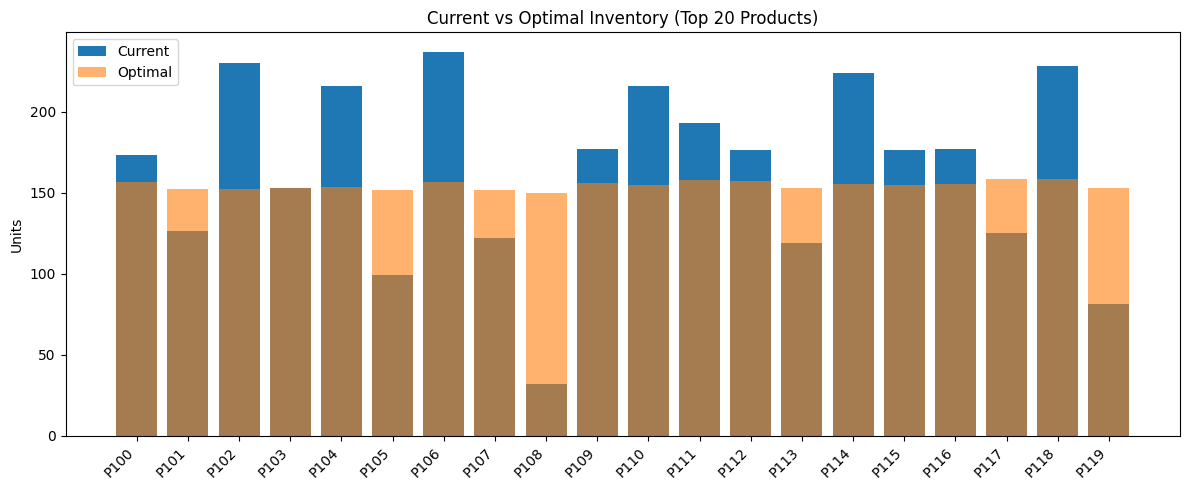

In [8]:
# ## 6. Visualization
# Inventory comparison chart

# %%
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.bar(df['product_id'][:20], df['current_inventory'][:20], label='Current')
plt.bar(df['product_id'][:20], df['predicted_inventory'][:20], alpha=0.6, label='Optimal')
plt.xticks(rotation=45, ha='right')
plt.title("Current vs Optimal Inventory (Top 20 Products)")
plt.ylabel("Units")
plt.legend()
plt.tight_layout()
plt.show()